In [1]:
# import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

# add the data files as variables
mouse_metadata_path = Path("data/Mouse_metadata.csv")
study_results_path = Path("data/Study_results.csv")

# read the mouse data and study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# combine the data into a dataframe
mouse_study_pd = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# display the dataframe
mouse_study_pd.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# check the number of mice.
mice_count = mouse_study_pd["Mouse ID"].nunique()
mice_count

249

In [3]:
# organize data by Mouse ID and Timepoint
mouse_study_pd = mouse_study_pd.sort_values(by=["Mouse ID", "Timepoint"])
mouse_study_pd.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
113,a203,0,45.000000,0,Infubinol,Female,20,23
389,a203,5,48.508468,0,Infubinol,Female,20,23
598,a203,10,51.852437,1,Infubinol,Female,20,23
758,a203,15,52.777870,1,Infubinol,Female,20,23
1018,a203,20,55.173336,1,Infubinol,Female,20,23


In [4]:
# get all the data that has duplicated Mouse ID and Timepoint
duplicates = mouse_study_pd[mouse_study_pd.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# create a clean dataframe by dropping the mouse with duplicate data
mouse_study_clean = mouse_study_pd.loc[mouse_study_pd["Mouse ID"] != "g989"]
mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
113,a203,0,45.000000,0,Infubinol,Female,20,23
389,a203,5,48.508468,0,Infubinol,Female,20,23
598,a203,10,51.852437,1,Infubinol,Female,20,23
758,a203,15,52.777870,1,Infubinol,Female,20,23
1018,a203,20,55.173336,1,Infubinol,Female,20,23


In [6]:
 # check the number of mice in the clean dataframe
mice_count_clean = mouse_study_clean["Mouse ID"].nunique()
mice_count_clean

248

In [7]:
# generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# use groupby and summary statiscal methods to calculate the following properties for each drug regimen
# mean, median, variance, standard deviation, and SEM of the tumor volume
regimen_mean = mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_var = mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std = mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# organize the resulting series into a summary dataframe
regimen_summary=pd.DataFrame({
    "Mean Tumor Volume": regimen_mean,
    "Median Tumor Volume": regimen_median,
    "Tumor Volume Variance":regimen_var,
    "Tumor Volume Std Dev": regimen_std,
    "Tumor Volume Std Err":regimen_sem
})

regimen_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# using the aggregation method, produce the same summary statistics in a single line
summary_stats = mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)

summary_stats

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


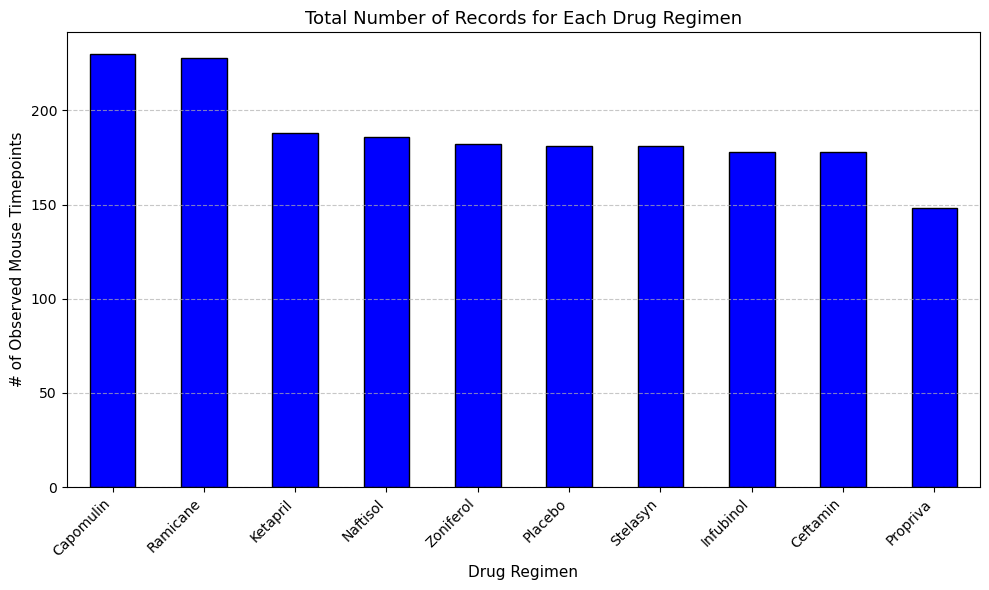

In [9]:
# generate a bor plat showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pandas
# create a variable for the counts (y-axis)
regimen_counts = mouse_study_clean["Drug Regimen"].value_counts()

# create the bar chart
regimen_counts_bar = regimen_counts.plot(kind="bar", figsize=(10,6), color="blue", edgecolor="black")

# add labels and title
regimen_counts_bar.set_title("Total Number of Records for Each Drug Regimen", fontsize=13)
regimen_counts_bar.set_xlabel("Drug Regimen", fontsize=11)
regimen_counts_bar.set_ylabel("# of Observed Mouse Timepoints", fontsize=11)
regimen_counts_bar.set_xticklabels(regimen_counts_bar.get_xticklabels(), rotation=45, ha="right")
regimen_counts_bar.grid(axis="y", linestyle="--", alpha=0.7)

#show the plot
plt.tight_layout()
plt.show()

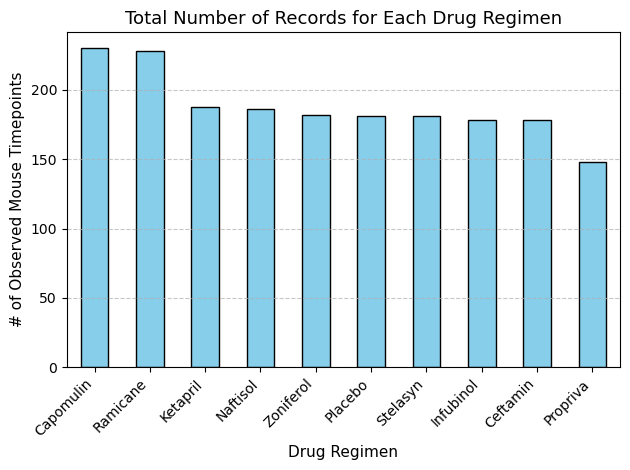

In [10]:
# generate a bor plat showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
# create the bar chart
regimen_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# add labels and title
plt.title("Total Number of Records for Each Drug Regimen", fontsize=13)
plt.xlabel("Drug Regimen", fontsize=11)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=11)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

#show the plot
plt.tight_layout()
plt.show()

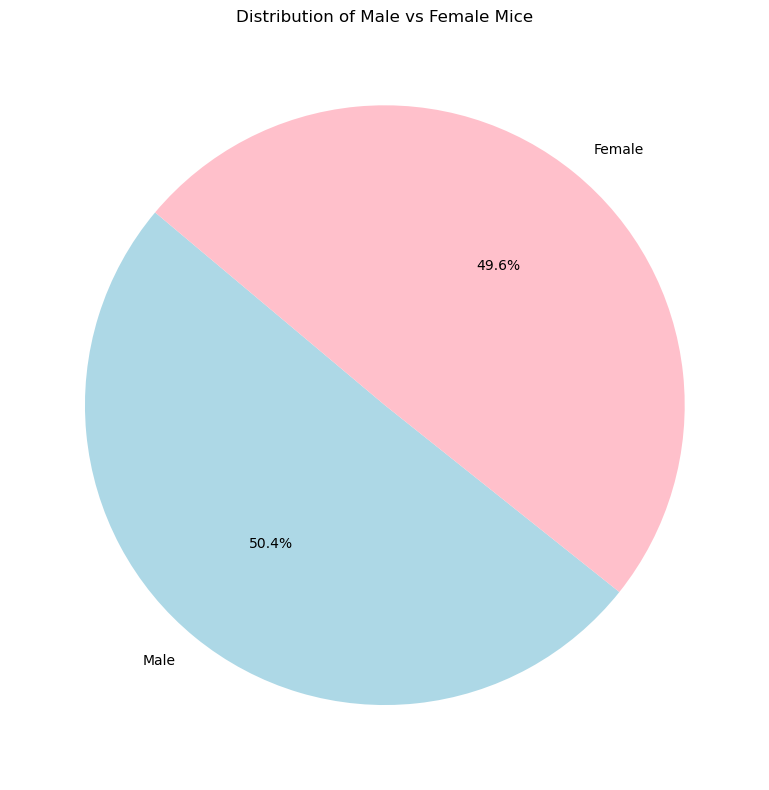

In [11]:
# generate a pie chart using pandas showing the distribution of unique female versus male mice used in the study
# create a variable for number mice by gender from the clean dataframe
unique_mice_gender= mouse_study_clean.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()

# create a pie chart using pandas
unique_mice_gender_pie=unique_mice_gender.plot(kind="pie",
                                               autopct="%1.1f%%",
                                               startangle=140,
                                               figsize=(8,8),
                                               colors=["lightblue", "pink"],
                                               labels=["Male","Female"],
                                               ylabel="",
                                               title="Distribution of Male vs Female Mice")

# display the pie chart
plt.tight_layout()
plt.show()

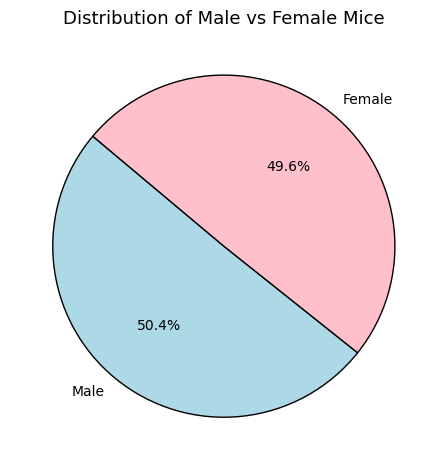

In [12]:
# generate a pie chart using pyplot showing the distribution of unique female versus male mice used in the study
plt.pie(unique_mice_gender.values,
        labels=unique_mice_gender.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=["lightblue","pink"],
        wedgeprops={"edgecolor":"black"})

# add a title
plt.title("Distribution of Male vs Female Mice", fontsize=13)

# show plot
plt.tight_layout()
plt.show()

In [13]:
# calculate the final tumor volume for each mouse across four of the treatment regimens:
#Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data=mouse_study_clean[mouse_study_clean["Drug Regimen"].isin(treatment_regimens)]

# get the last (greatest) timepoint for each mouse
last_timepoint=filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# merge with origiinal df to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, mouse_study_clean, on=["Mouse ID", "Timepoint"], how="left")

# display the resulting dataframe
final_tumor_volume=final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatment_regimens)]
final_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# create an empty list for plotting
tumor_volume=final_tumor_volume["Tumor Volume (mm3)"].tolist()


In [15]:
# calculate the IQR and quantitatively determine if ther are any outliers
# create an empty dictionary (outliers for each regime) for outliers
outliers={}

# loop through each drug regime and filter the tumor volumes for the regime
for regimen in treatment_regimens:
    regimen_data=final_tumor_volume[final_tumor_volume["Drug Regimen"]==regimen]["Tumor Volume (mm3)"]

    # calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1= st.scoreatpercentile(regimen_data, 25)
    Q3= st.scoreatpercentile(regimen_data, 75)

    # calculate IQR
    IQR= st.iqr(regimen_data)

    # calculate the lower and upper bounds for outliers
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR

    # find outliers 
    regimen_outliers=regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]

    # store outliers in dictionary
    outliers[regimen]=regimen_outliers

# show outliers
outliers


{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Ramicane': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Infubinol': 15    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}

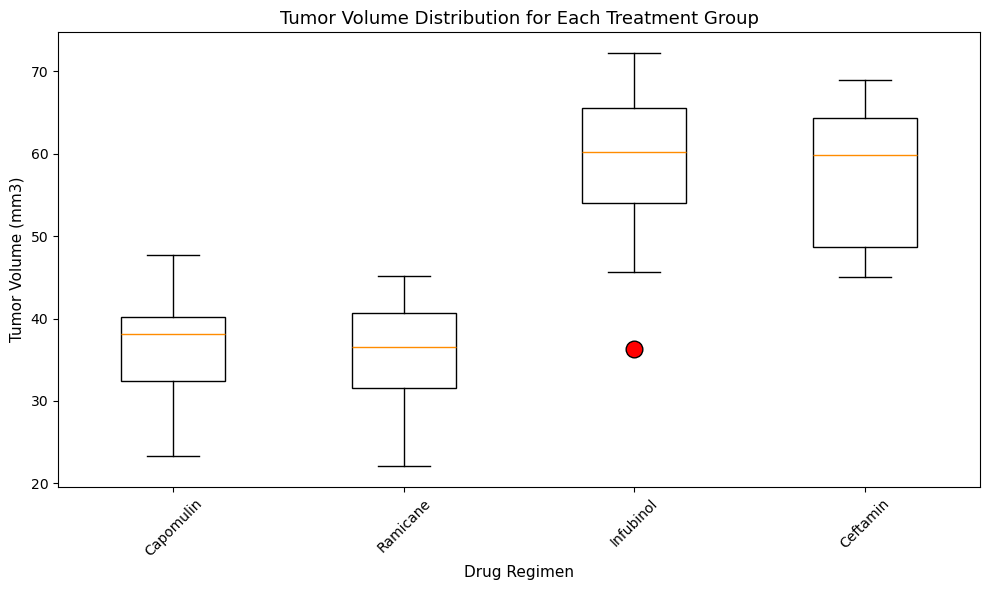

In [21]:
# create a box plot that shows the distribution of the tumor volumes for each treatment regimen
plt.figure(figsize=(10,6))
plt.boxplot([final_tumor_volume[final_tumor_volume["Drug Regimen"]==regimen]["Tumor Volume (mm3)"].tolist() for regimen in treatment_regimens], 
            patch_artist=True,
            boxprops=dict(facecolor="white",color="black"),
            medianprops=dict(color="darkorange"),
            flierprops=dict(marker="o", color="red", markersize=12, markerfacecolor="red"))

# add x-axis labels
plt.xticks(ticks=range(1, len(treatment_regimens)+1),labels=treatment_regimens, rotation=45)

# add title and labels
plt.title("Tumor Volume Distribution for Each Treatment Group", fontsize=13)
plt.xlabel("Drug Regimen", fontsize=11)
plt.ylabel("Tumor Volume (mm3)", fontsize=11)

# rotate the x-axis lables
plt.xticks(rotation=45)

# display plot
plt.tight_layout()
plt.show()

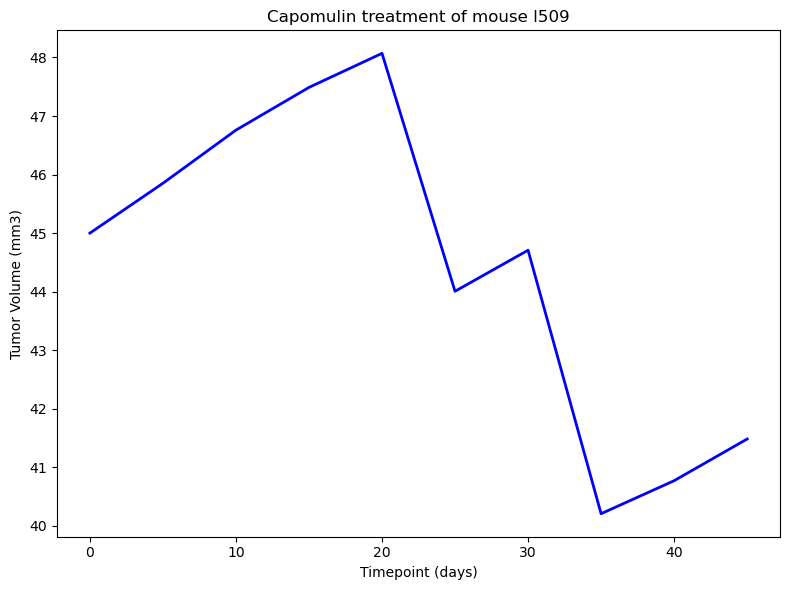

In [17]:
# create a line plot of tumor volume vs time point for a single mouse treated with Capomulin
mouse_l509_data=mouse_study_clean[(mouse_study_clean["Mouse ID"]=="l509")]

# create line plot for tumor volume vs timepoint
plt.figure(figsize=(8,6))
plt.plot(mouse_l509_data["Timepoint"], mouse_l509_data["Tumor Volume (mm3)"],color="b",linewidth=2)

# add title and labels
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# display the plot
plt.tight_layout()
plt.show()

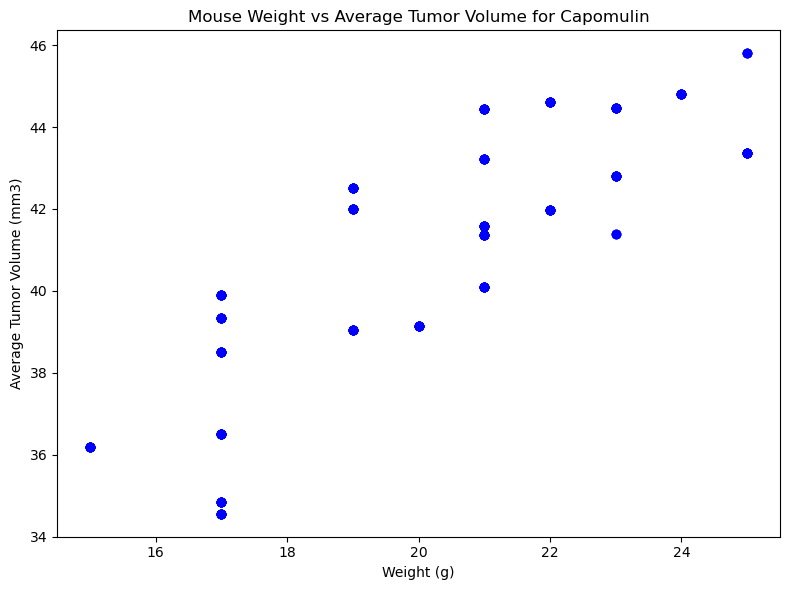

In [18]:
# Generate a scatter plot of mouse weight vs average observed tumor volume for the entire Capomulin regimen
# filter the clean dataframe for the capomulin regimen
capomulin_data=mouse_study_clean[mouse_study_clean["Drug Regimen"]=="Capomulin"]

# group by the Mouse ID and calculate the average tumor volume
avg_tumor_volume=capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

# merge the average tumor volume data with the original dataframe to get mouse weight
mouse_weight_data=pd.merge(avg_tumor_volume, mouse_study_clean[["Mouse ID", "Weight (g)"]], on="Mouse ID", how="left")

# create scatter plot
plt.figure(figsize=(8,6))
plt.scatter(mouse_weight_data["Weight (g)"], mouse_weight_data["Tumor Volume (mm3)"], color="b", marker="o")

# add title and labels
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# display plot
plt.tight_layout()
plt.show()

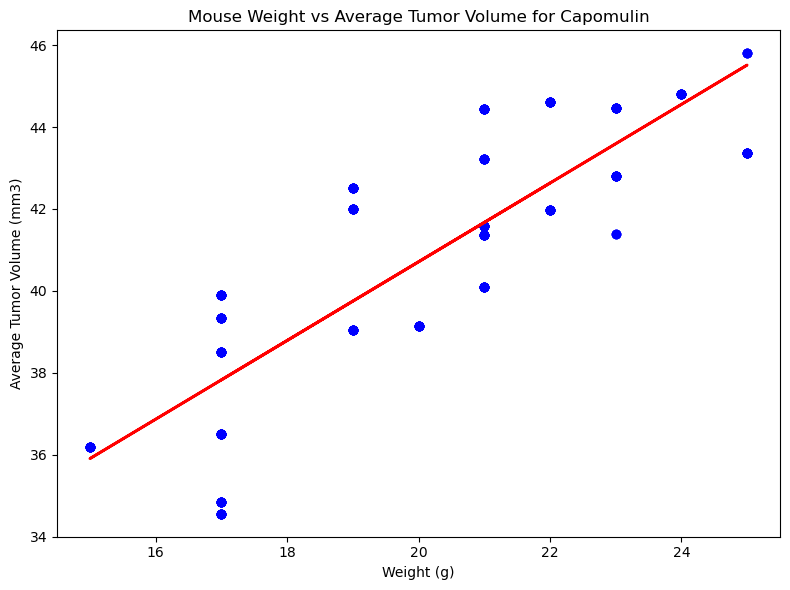

In [19]:
# calculate the correlation coefficient 
correlation_coefficient, _= st.pearsonr(mouse_weight_data["Weight (g)"], mouse_weight_data["Tumor Volume (mm3)"])

# perform linear regression 
slope, intercept, r_value, p_value, std_err= st.linregress(mouse_weight_data["Weight (g)"], mouse_weight_data["Tumor Volume (mm3)"])

# create scatter plot with linear regression line
plt.figure(figsize=(8,6))
plt.scatter(mouse_weight_data["Weight (g)"], mouse_weight_data["Tumor Volume (mm3)"], color="b", marker="o")
plt.plot(mouse_weight_data["Weight (g)"], slope*mouse_weight_data["Weight (g)"] + intercept, color="r", linewidth=2)

# add title and labels
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# display plot
plt.tight_layout()
plt.show()